# WORK IN PROGRESS

    Customer Segmentation & RFM <--
    Categorical Analysis
    Campaign Effectiveness & Campaign Comparisons
    Promotions / Coupons
    Loyalty
    Basket Analysis?


In [1]:
# Loading relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set directory
import os
pwd = os.getcwd()


In [3]:
# Load campaign descriptions
campaign_desc = pd.read_csv("campaign_desc.csv")
# Load campaign table
campaign_table = pd.read_csv("campaign_table.csv")
# Load causal data
causal_data = pd.read_csv("causal_data.csv")
# Load coupon data
coupon = pd.read_csv("coupon.csv")
# Load coupon redemption data
coupon_redempt = pd.read_csv("coupon_redempt.csv")
# Load household demographics
hh_demographic = pd.read_csv("hh_demographic.csv")
# Load product data
product = pd.read_csv("product.csv")
# Load transaction data
transaction_data = pd.read_csv("transaction_data.csv")


In [ ]:
# Data overview for campaign_desc
print(campaign_desc.head(10))       # Preview first 10 rows
print(campaign_desc.shape)         # Dimensions (rows, columns)
print(campaign_desc.dtypes)        # Data types of columns
print(campaign_desc.describe())    # Summary statistics
print(campaign_desc.columns)       # Column names
print(campaign_desc.nunique())     # Number of unique values per column

In [5]:
# Quick overview of transacitons, households and products tables
print("Transactions data shape:", transaction_data.shape)
print("Demographics data shape:", hh_demographic.shape)
print("Product data shape:", product.shape)

Transactions data shape: (2595732, 12)
Demographics data shape: (801, 8)
Product data shape: (92353, 7)


In [9]:
num_households = transaction_data['household_key'].nunique()
num_households_demographics = hh_demographic['household_key'].nunique()

print(f"Number of unique households in transactions: {num_households}")
print(f"Number of unique households in demographics: {num_households_demographics}")
print(f"Number of households with demographic information: {num_households_demographics / num_households:.2%}")

Number of unique households in transactions: 2500
Number of unique households in demographics: 801
Number of households with demographic information: 32.04%


## Customer Segmentation & RFM Breakdown

In [22]:
# Aggregate transactions by household, creating a table called rfm for this
rfm = transaction_data.groupby('household_key').agg({
    'DAY': ['min', 'max'],
    'BASKET_ID': 'nunique',
    'SALES_VALUE': 'sum'
})

rfm.columns = ['first_purchase_day', 'last_purchase_day', 'frequency', 'monetary']

In [23]:
# RECENCY -- assuming this with max of day
max_day = transaction_data['DAY'].max()
rfm['recency'] = max_day - rfm['last_purchase_day']

In [24]:
rfm = rfm.reset_index()

In [26]:
rfm[['household_key', 'recency', 'frequency', 'monetary']].head(10)

,household_key,recency,frequency,monetary
0,1,5,86,4330.16
1,2,43,45,1954.34
2,3,8,47,2653.21
3,4,84,30,1200.11
4,5,8,40,779.06
5,6,4,250,5996.16
6,7,2,59,3400.05
7,8,5,113,5534.97
8,9,22,20,797.42
9,10,26,9,234.34


In [31]:
# RFM Scores

# RECENCY
rfm['R_quintile'] = pd.qcut(rfm['recency'], 5, labels=False) + 1

# FREQUENCY AND MONETARY
rfm['F_quintile'] = pd.qcut(rfm['frequency'], 5, labels=False) + 1
rfm['M_quintile'] = pd.qcut(rfm['monetary'], 5, labels=False) + 1

# Calculate RFM score (R*100 + F*10 + M)
rfm['RFM_score'] = rfm['R_quintile'] * 100 + rfm['F_quintile'] * 10 + rfm['M_quintile']

# Display RFM scores for the first 10 households
rfm[['household_key', 'recency', 'frequency', 'monetary', 
     'R_quintile', 'F_quintile', 'M_quintile', 'RFM_score']].head(10)


,household_key,recency,frequency,monetary,R_quintile,F_quintile,M_quintile,RFM_score
0,1,5,86,4330.16,3,3,4,334
1,2,43,45,1954.34,5,2,3,523
2,3,8,47,2653.21,3,2,3,323
3,4,84,30,1200.11,5,1,2,512
4,5,8,40,779.06,3,2,2,322
5,6,4,250,5996.16,2,5,5,255
6,7,2,59,3400.05,2,2,4,224
7,8,5,113,5534.97,3,4,5,345
8,9,22,20,797.42,4,1,2,412
9,10,26,9,234.34,4,1,1,411


In [35]:
rfm_table = rfm[['household_key', 'recency', 'frequency', 'monetary', 
                 'R_quintile', 'F_quintile', 'M_quintile', 'RFM_score']]


C:\Users\andya\AppData\Local\Temp\ipykernel_11592\1071962803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='R_quintile', palette='Blues')
C:\Users\andya\AppData\Local\Temp\ipykernel_11592\1071962803.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='F_quintile', palette='Greens')
C:\Users\andya\AppData\Local\Temp\ipykernel_11592\1071962803.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='M_quintile', palette='Purples')


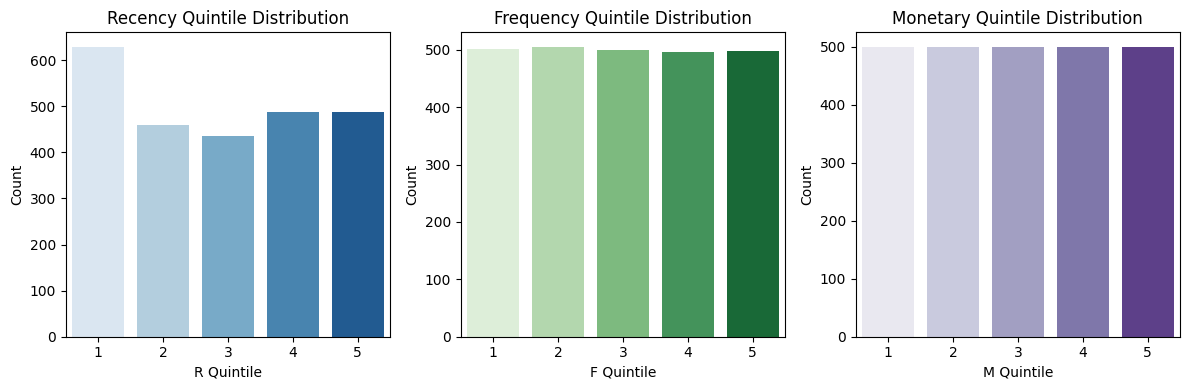

In [37]:
# Plot count distribution for RFM quintiles
plt.figure(figsize=(12, 4))

# Recency Quintile
plt.subplot(1, 3, 1)
sns.countplot(data=rfm, x='R_quintile', palette='Blues')
plt.title('Recency Quintile Distribution')
plt.xlabel('R Quintile')
plt.ylabel('Count')

# Frequency Quintile
plt.subplot(1, 3, 2)
sns.countplot(data=rfm, x='F_quintile', palette='Greens')
plt.title('Frequency Quintile Distribution')
plt.xlabel('F Quintile')
plt.ylabel('Count')

# Monetary Quintile
plt.subplot(1, 3, 3)
sns.countplot(data=rfm, x='M_quintile', palette='Purples')
plt.title('Monetary Quintile Distribution')
plt.xlabel('M Quintile')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\andya\AppData\Local\Temp\ipykernel_11592\2981673366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_score_counts, x='RFM_score', y='Count', palette='viridis')


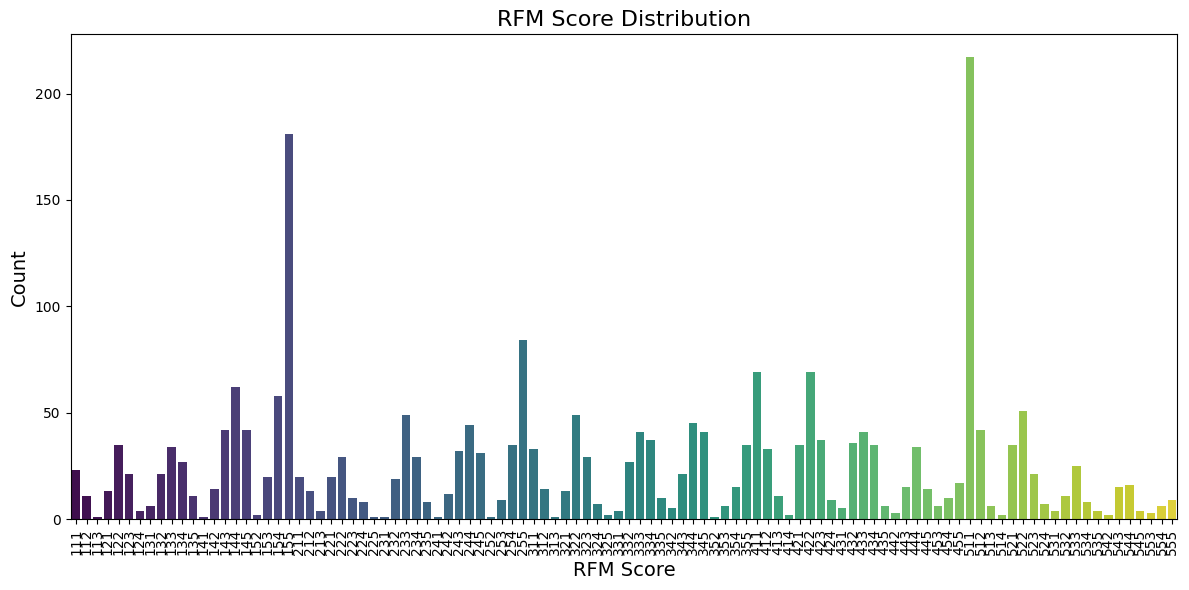

In [ ]:
# Group by RFM_score and count the number of households
rfm_score_counts = rfm_table.groupby('RFM_score')['household_key'].count().reset_index()
rfm_score_counts.rename(columns={'household_key': 'Count'}, inplace=True)

# Plot the RFM score distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=rfm_score_counts, x='RFM_score', y='Count', palette='viridis')
plt.title('RFM Score Distribution', fontsize=16)
plt.xlabel('RFM Score', fontsize=14) 
plt.ylabel('Count', fontsize=14) 
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


## Categorical Analysis

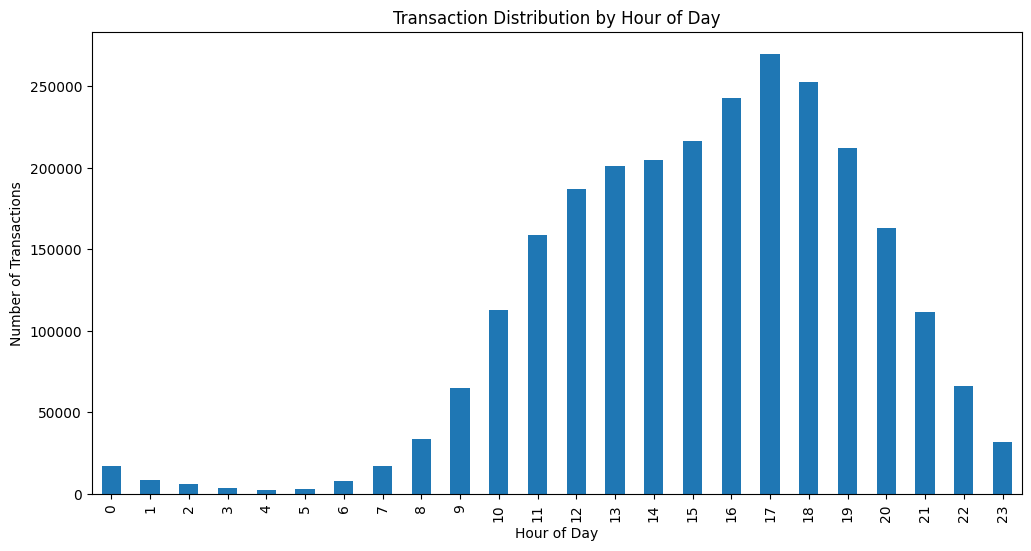

In [ ]:
# Transaction data by hour of day
transaction_data['HOUR'] = transaction_data['TRANS_TIME'].str[:2].astype(int)
plt.figure(figsize=(12, 6))
transaction_data['HOUR'].value_counts().sort_index().plot(kind='bar')
plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

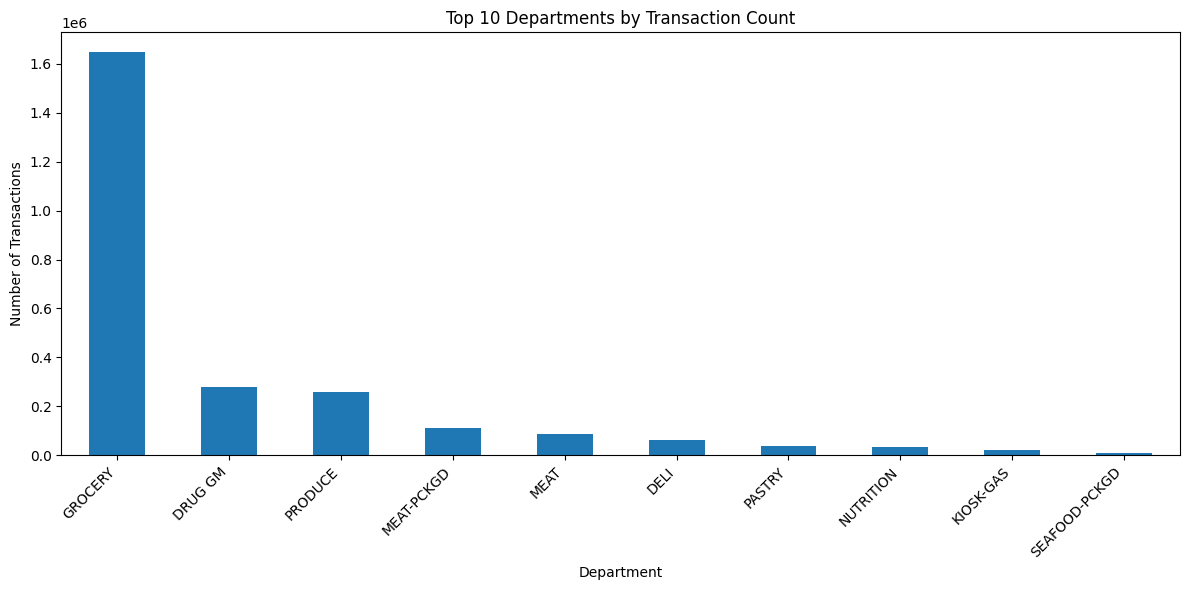

In [13]:
# Explore product categories
product_counts = transaction_data.merge(product, on='PRODUCT_ID')['DEPARTMENT'].value_counts().head(10)
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar')
plt.title('Top 10 Departments by Transaction Count')
plt.xlabel('Department')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Campaign Effectiveness & Campaign Comparisons

## Promotional / Coupons

## Loyalty

## Basket Analysis?